In [1]:
import pickle

In [2]:
from preprocess.data_tokenization import DataTokenizationTask
from preprocess.questions_label_extraction import QuestionsLabelExtractionTask

In [3]:
import utils.luigi_wrapper as luigi
from utils.utils import *

In [5]:
arr = QuestionsLabelExtractionTask.get_outputs()
arr

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
train_test_split(list(range(10)), test_size=0.2)

[[2, 4, 6, 7, 3, 9, 8, 1], [5, 0]]

In [17]:
for a in arr:
    pass

In [20]:
with open('cache/raw_data/full_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [24]:
df.iloc[train_test_split(list(range(10)), test_size=0.2)[0]].index

Index(['Mizuki Fukumura', 'Know No Better (song)', 'Paul Masvidal',
       'Pick Withers', 'Selene Vigil-Wilk', 'Mitsuru Igarashi', 'Liam Tyson',
       'Howard Gray'],
      dtype='object', name='page')

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np

In [6]:
df.head()

,text,infobox
page,,
Sean Tyla,"Sean Tyla (born John Michael Kenneth Tyler, 3 ...","{'name': 'Sean Tyla', 'background': 'solo_sing..."
Michael Sheridan (musician),Michael Sheridan is an Australian guitarist. H...,"{'name': 'Michael Sheridan', 'background': 'no..."
Mizuki Fukumura,"Mizuki Fukumura (譜久村 聖, Fukumura Mizuki, born ...","{'name': 'Mizuki Fukumura', 'image': '161006 A..."
Mitsuru Igarashi,"Mitsuru Igarashi (五十嵐 充, Igarashi Mitsuru, bor...","{'name': 'Mitsuru Igarashi', 'background': 'no..."
Paul Masvidal,"Paul Albert Masvidal (born January 20, 1971) i...","{'name': 'Paul Masvidal', 'image': 'Paul Masvi..."


In [7]:
df['label'] = df.apply(lambda row: list(row.infobox.keys()), axis=1)

In [8]:
df.head()

,text,infobox,label
page,,,
Sean Tyla,"Sean Tyla (born John Michael Kenneth Tyler, 3 ...","{'name': 'Sean Tyla', 'background': 'solo_sing...","[name, background, birth_name, birth_date, bir..."
Michael Sheridan (musician),Michael Sheridan is an Australian guitarist. H...,"{'name': 'Michael Sheridan', 'background': 'no...","[name, background, birth_place, instrument, ye..."
Mizuki Fukumura,"Mizuki Fukumura (譜久村 聖, Fukumura Mizuki, born ...","{'name': 'Mizuki Fukumura', 'image': '161006 A...","[name, image, background, native_name, native_..."
Mitsuru Igarashi,"Mitsuru Igarashi (五十嵐 充, Igarashi Mitsuru, bor...","{'name': 'Mitsuru Igarashi', 'background': 'no...","[name, background, birth_date, birth_place, ge..."
Paul Masvidal,"Paul Albert Masvidal (born January 20, 1971) i...","{'name': 'Paul Masvidal', 'image': 'Paul Masvi...","[name, image, image_size, landscape, backgroun..."


In [9]:
labels = {}
for row in df.iterrows():
    for label in row[1]['label']:
        if label in labels.keys():
            labels[label] += 1
        else:
            labels[label] = 1

(array([117.,  29.,   8.,   7.,   4.,   6.,   1.,   3.,   1.,   0.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

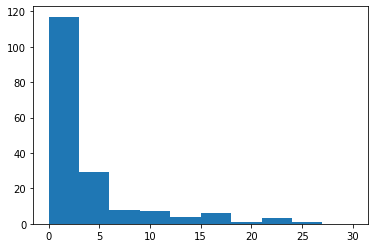

In [10]:
plt.hist(labels.values(), range=(0, 30))

(array([36.,  5.,  0.,  2.,  0.,  2.,  1.,  4.,  1.,  4.]),
 array([  30.,  327.,  624.,  921., 1218., 1515., 1812., 2109., 2406.,
        2703., 3000.]),
 <a list of 10 Patch objects>)

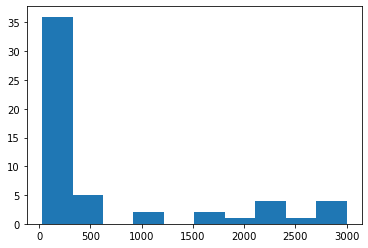

In [11]:
plt.hist(labels.values(), range=(30, 3000))

In [12]:
classes = [key for key, value in labels.items() if value >= QuestionsLabelExtractionTask.NOT_FREQ_LABEL_THRESH]
classes = list(set(classes))

In [13]:
len(classes)

56

In [14]:
labels

{'name': 3365,
 'background': 2752,
 'birth_name': 1775,
 'birth_date': 2819,
 'birth_place': 2247,
 'instrument': 2318,
 'genre': 2819,
 'occupation': 2719,
 'years_active': 2319,
 'associated_acts': 2506,
 'image': 2225,
 'native_name': 301,
 'native_name_lang': 176,
 'label': 1722,
 'website': 1194,
 'image_size': 359,
 'landscape': 220,
 'origin': 927,
 'caption': 1946,
 'alias': 558,
 'cover': 216,
 'type': 242,
 'artist': 278,
 'EP': 2,
 'released': 278,
 'format': 68,
 'studio': 99,
 'length': 262,
 'writer': 108,
 'producer': 248,
 'chronology': 21,
 'prev_title': 207,
 'prev_year': 207,
 'next_title': 219,
 'next_year': 219,
 'misc': 151,
 'alma_mater': 37,
 'module': 357,
 'children': 93,
 'spouse': 120,
 'module2': 47,
 'death_date': 468,
 'signature': 38,
 'Instruments': 7,
 'Labels': 2,
 'death_place': 379,
 'recorded': 249,
 'Associated_acts': 12,
 'nationality': 64,
 'album': 101,
 'B-side': 46,
 'alt': 101,
 'other_names': 39,
 'height': 39,
 'hair_color': 2,
 'eye_colo

In [19]:
len(list(labels.keys()))

232

In [20]:
QuestionsLabelExtractionTask.clean_questions(list(labels.keys()))

['image_upright',
 'years_act',
 'border',
 'home town',
 'spouse(s)',
 'signature_alt',
 'eye_color',
 'past_memb',
 'spous',
 'chronolog',
 'compil',
 'alt',
 'death',
 'module2',
 'father',
 'alma_mat',
 'twitter',
 'venu',
 'next_titl',
 'album',
 'italic_titl',
 'honorific_prefix',
 'module3',
 'parti',
 'b-side',
 'criminal_statu',
 'relat',
 'othernam',
 'famili',
 'artist',
 'EP',
 'a-sid',
 'nicknam',
 'image_s',
 'prev_year',
 'net_worth',
 'other nam',
 'award',
 'noteable instru',
 'birth dat',
 'hous',
 'work',
 'agent',
 'img_capt',
 'befor',
 'represent',
 'studio',
 'landscap',
 'burial_plac',
 'distributor',
 'born',
 'birth_plac',
 'title2',
 'gross',
 'img_siz',
 'colleg',
 'associated_act',
 'notable_instru',
 'notablework',
 'full_nam',
 'fetchwikidata',
 'citizenship',
 'honorific_suffix',
 'img',
 'weight_lb',
 'statu',
 'prev_title2',
 'cinematographi',
 'organ',
 'after',
 'creator',
 'cover',
 'height_cm',
 'brother',
 'signature_s',
 'altur',
 'titl',
 'curre

In [15]:
label_count = len(classes)
num_pages = len(df)

In [16]:
label_count, num_pages

(56, 3474)

In [17]:
label_to_index = {}
index_to_label = {}
for i in range(label_count):
    label_to_index[classes[i]] = i
    index_to_label[i] = classes[i]

In [18]:
pij = np.zeros((label_count, label_count))
for lst in df.label.tolist():
    for o1 in lst:
        if not o1 in classes:
            continue
        for o2 in lst:
            if not o2 in classes:
                continue
            pij[label_to_index[o1], label_to_index[o2]] += 1/num_pages

In [19]:
classes

['caption',
 'module',
 'past_members',
 'other_names',
 'artist',
 'image',
 'format',
 'landscape',
 'studio',
 'alias',
 'recorded',
 'residence',
 'occupation',
 'native_name_lang',
 'birth_date',
 'writer',
 'years_active',
 'image_size',
 'associated_acts',
 'instrument',
 'prev_title',
 'native_name',
 'death_place',
 'background',
 'alt',
 'label',
 'instruments',
 'name',
 'type',
 'B-side',
 'height',
 'signature',
 'website',
 'misc',
 'children',
 'death_date',
 'border',
 'origin',
 'module2',
 'birth_place',
 'producer',
 'length',
 'alma_mater',
 'cover',
 'current_members',
 'album',
 'genre',
 'next_title',
 'agent',
 'next_year',
 'nationality',
 'prev_year',
 'education',
 'birth_name',
 'spouse',
 'released']

In [20]:
pij

array([[0.5601612 , 0.08232585, 0.00834773, ..., 0.34283247, 0.02849741,
        0.00230282],
       [0.08232585, 0.10276339, 0.        , ..., 0.06217617, 0.02677029,
        0.        ],
       [0.00834773, 0.        , 0.01180196, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34283247, 0.06217617, 0.        , ..., 0.5109384 , 0.02446747,
        0.        ],
       [0.02849741, 0.02677029, 0.        , ..., 0.02446747, 0.03454231,
        0.        ],
       [0.00230282, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08002303]])

In [21]:
E = np.zeros((label_count, label_count))
for i in range(label_count):
    for j in range(label_count):
        E[i, j] = pij[i,j] * np.log(pij[i,j] / (pij[i, i] * pij[j, j]))
E_filled = np.nan_to_num(E)

C:\Users\Aviv\Anaconda3\envs\research_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Aviv\Anaconda3\envs\research_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [22]:
E

array([[ 0.3246306 ,  0.02945509,  0.00194714, ...,  0.06188934,
         0.01103302, -0.00683627],
       [ 0.02945509,  0.23382022,         nan, ...,  0.01051081,
         0.05408761,         nan],
       [ 0.00194714,         nan,  0.05239467, ...,         nan,
                nan,         nan],
       ...,
       [ 0.06188934,  0.01051081,         nan, ...,  0.34309833,
         0.00799269,         nan],
       [ 0.01103302,  0.05408761,         nan, ...,  0.00799269,
         0.11625458,         nan],
       [-0.00683627,         nan,         nan, ...,         nan,
                nan,  0.20209342]])

In [23]:
import networkx as nx

In [26]:
from community import best_partition

In [29]:
communities

{'caption': 0,
 'module': 1,
 'past_members': 2,
 'other_names': 3,
 'artist': 4,
 'image': 5,
 'format': 6,
 'landscape': 7,
 'studio': 8,
 'alias': 9,
 'recorded': 10,
 'residence': 11,
 'occupation': 12,
 'native_name_lang': 13,
 'birth_date': 14,
 'writer': 15,
 'years_active': 16,
 'image_size': 17,
 'associated_acts': 18,
 'instrument': 19,
 'prev_title': 20,
 'native_name': 21,
 'death_place': 22,
 'background': 23,
 'alt': 24,
 'label': 25,
 'instruments': 26,
 'name': 27,
 'type': 28,
 'B-side': 29,
 'height': 30,
 'signature': 31,
 'website': 32,
 'misc': 33,
 'children': 34,
 'death_date': 35,
 'border': 36,
 'origin': 37,
 'module2': 38,
 'birth_place': 39,
 'producer': 40,
 'length': 41,
 'alma_mater': 42,
 'cover': 43,
 'current_members': 44,
 'album': 45,
 'genre': 46,
 'next_title': 47,
 'agent': 48,
 'next_year': 49,
 'nationality': 50,
 'prev_year': 51,
 'education': 52,
 'birth_name': 53,
 'spouse': 54,
 'released': 55}

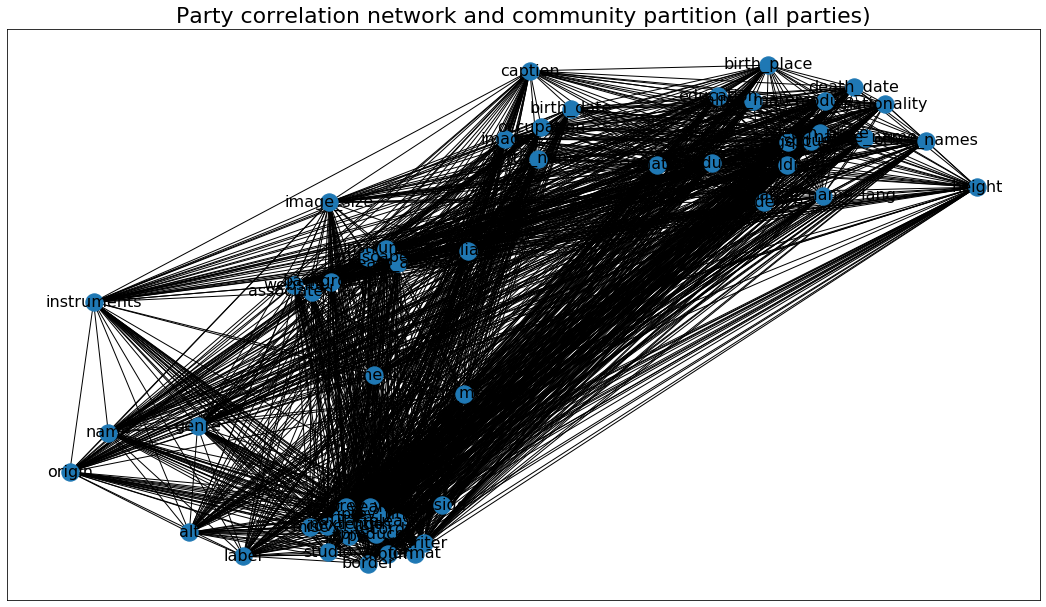

In [30]:
G=nx.Graph(E)
G=nx.relabel_nodes(G, dict(zip(G.nodes(), classes)))
#communities=best_partition(G)
#print(len(communities))
#community_colors={for }
#node_coloring=[community_colors[communities[node]] for node in G.nodes()]

nx.pos=nx.fruchterman_reingold_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=5000, weight='weight', scale=1.0, center=None)

nx.draw_networkx(G, cmap=plt.get_cmap('jet'), with_labels=True, font_size=16)
plt.title('Party correlation network and community partition (all parties)', fontsize=22)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)